In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Visualisations for inspecting distribution of a variable (Continuos Numerical Data)

In [11]:
continuous_data = df.Rating
continuous_data = continuous_data[ ~ np.isnan(continuous_data)]

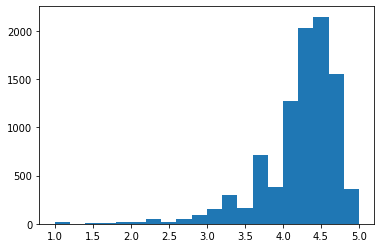

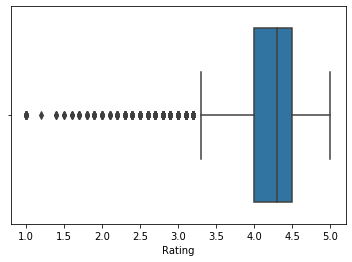

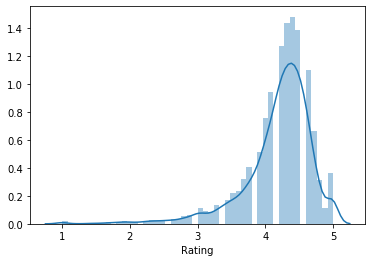

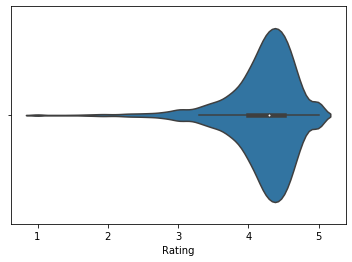

In [25]:
# Histogram
plt.hist(continuous_data, bins=20)
plt.show()

# Box Plot
sns.boxplot(continuous_data)
plt.show()

# Distribution Plot
sns.distplot(continuous_data)
plt.show()

# Violin Plot
sns.violinplot(continuous_data)
plt.show()

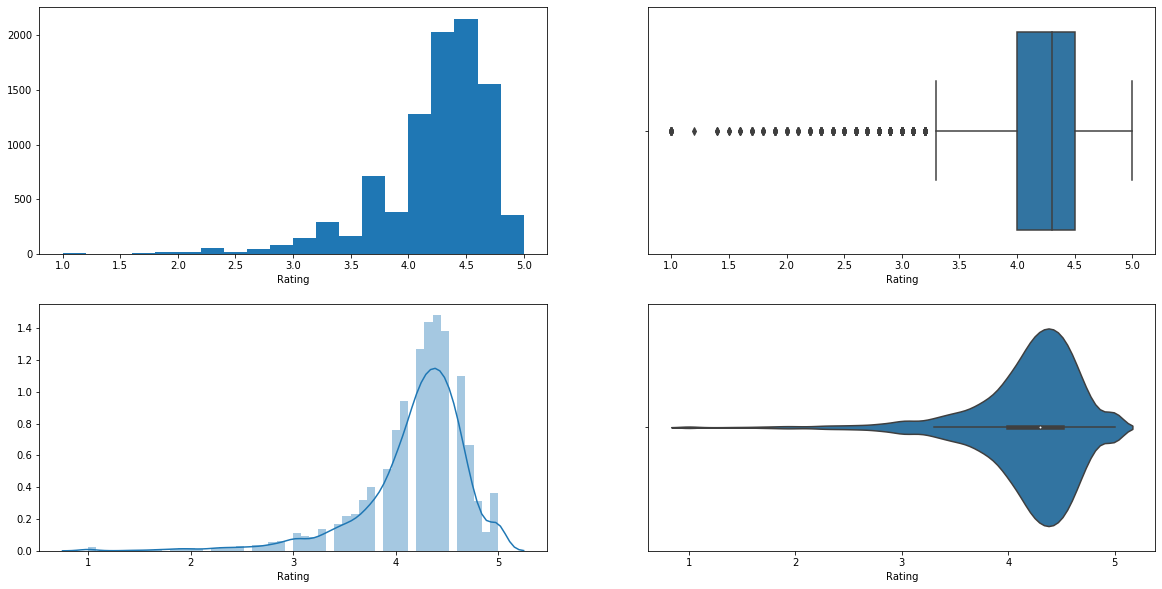

In [29]:
# For prettier layout
fig, ax = plt.subplots(2,2, figsize=(20,10))

# Histogram
ax[0,0].hist(continuous_data, bins=20)
ax[0,0].set_xlabel("Rating")

# Box Plot
sns.boxplot(continuous_data, ax=ax[0,1])

# Distribution Plot
sns.distplot(continuous_data, ax=ax[1,0])

# Violin Plot
sns.violinplot(continuous_data, ax=ax[1,1])

plt.show()

### Size Comparison

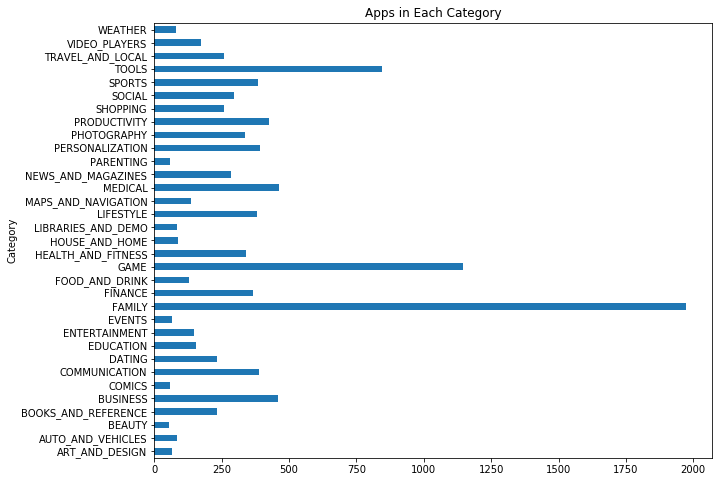

In [181]:
# Horizontal Bar Chart
category_counts = df.groupby("Category").count()['App']

category_counts.plot(kind='barh', figsize=(10,8))
plt.title("Apps in Each Category")
plt.xlabel("")
plt.show()

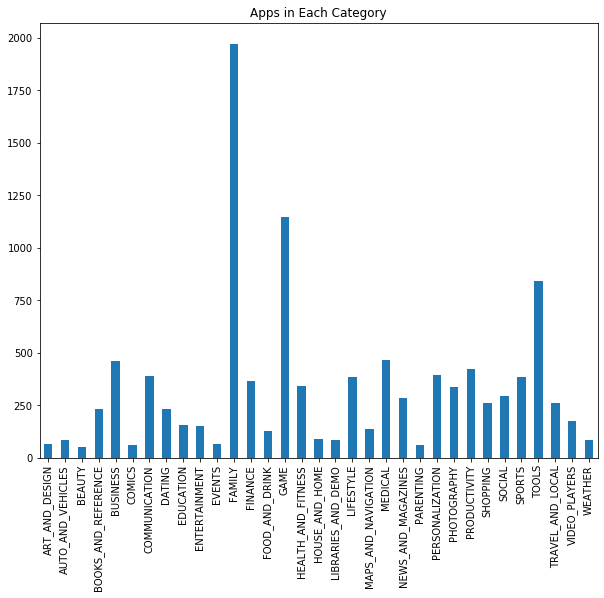

In [182]:
# Vertical Bar Chart/ Column Chart
category_counts.plot(kind='bar', figsize=(10,8))
plt.title("Apps in Each Category")
plt.xlabel("")
plt.show()

### Correlation (Relationship between two numerical variables)

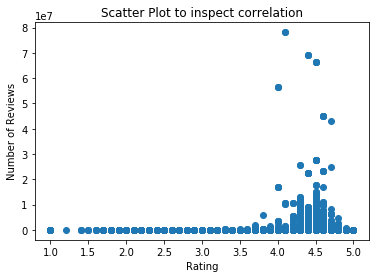

In [171]:
# Scatter Plot
plt.scatter(df.Rating, df.Reviews)
plt.ylabel("Number of Reviews")
plt.xlabel("Rating")
plt.title("Scatter Plot to inspect correlation")
plt.show()

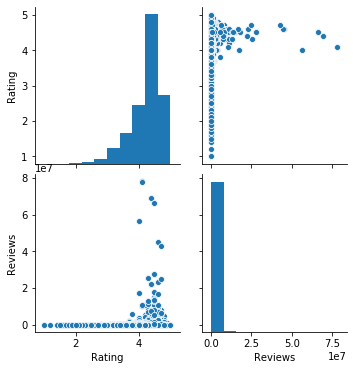

In [174]:
# Pairplots
sns.pairplot(df)
plt.show()

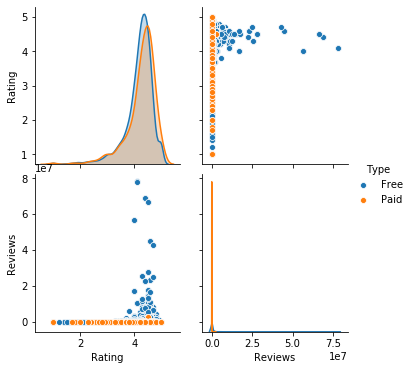

In [176]:
# Pairplots (using hue to include categories)
sns.pairplot(df, hue='Type')
plt.show()

### Ranking (for situations when order of quantities are most important)

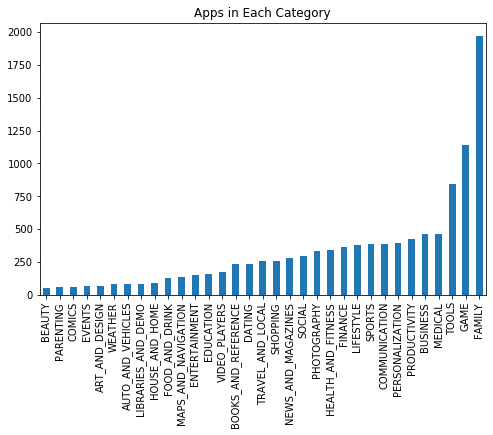

In [183]:
# Vertical (or Horizontal) Bar Plot
category_counts_sorted = category_counts.sort_values()

category_counts_sorted.plot(kind='bar', figsize=(8,5))
plt.title("Apps in Each Category")
plt.xlabel("")
plt.show()

#### For showing Composition (for categorically variables)

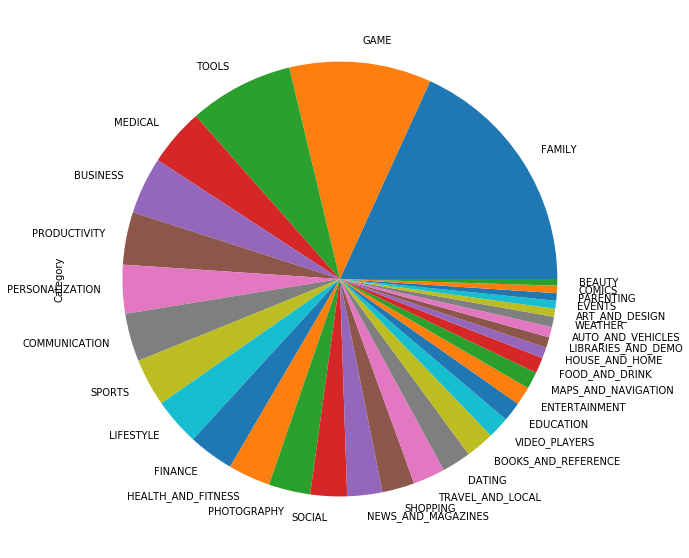

In [149]:
categorical_variable = df.Category.value_counts()

# Plot Pie chart
categorical_variable.plot(kind='pie', figsize=(10,10))

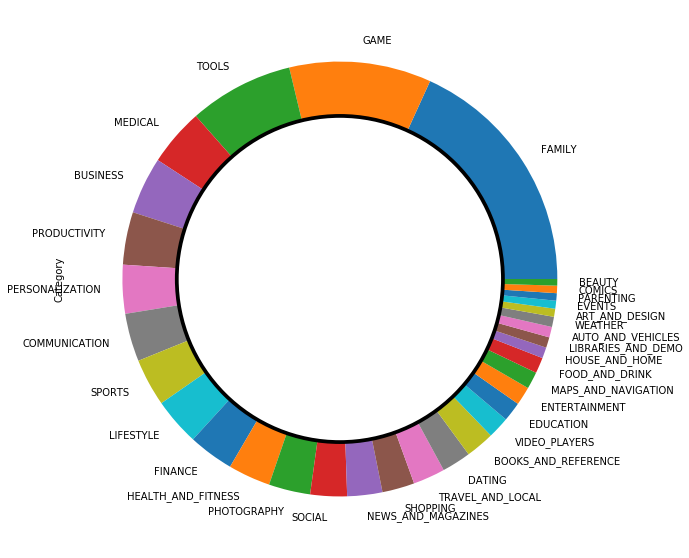

In [161]:
# Donut Chart (same as pie chart, just add a circle in the middle)

# Plot Pie chart
categorical_variable.plot(kind='pie', figsize=(10,10))

# Plot Circle in the middle 
centre_circle = plt.Circle(xy=(0,0), radius=0.75, color='black', fc='white',linewidth=3.75)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

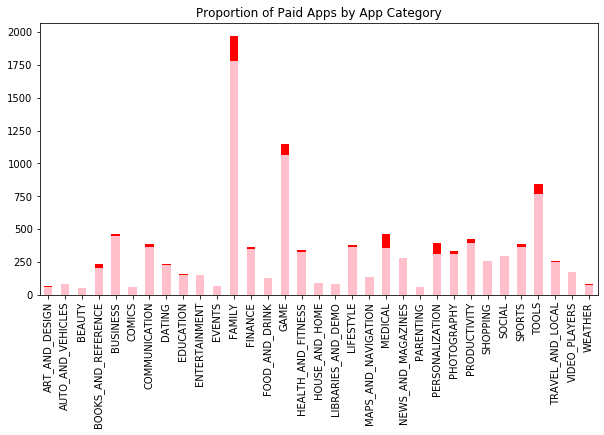

In [139]:
# Stacked Bar Chart
x = df.groupby(['Category', 'Type']).count()['App']
data = pd.concat((x[:,'Free'], x[:,'Paid']), axis=1).fillna(0)

plt.figure(figsize=(10,5))
data.iloc[:,0].plot(kind='bar', color='pink')
data.iloc[:,1].plot(kind='bar', bottom=data.iloc[:,0], color='red')
plt.title("Proportion of Paid Apps by App Category")
plt.show()

### For visualising trends
- Line Plot
- Bar Plot

In [194]:
trend_data = df.copy()['Installs']
trend_data.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [195]:
# Convert to numerical values ----> (1000+ to 1000)
trend_data = trend_data.str.replace(",", "").str.replace("+", "").astype(int)
# Get number of apps in each 'installs' category
trend_data = trend_data.value_counts()
# Sort by index for sorted x-axis values
trend_data = trend_data.sort_index()

trend_data.sample(5)

1000          908
1000000000     58
50            205
5000000       752
100           719
Name: Installs, dtype: int64

In [197]:
trend_data

0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           908
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: Installs, dtype: int64

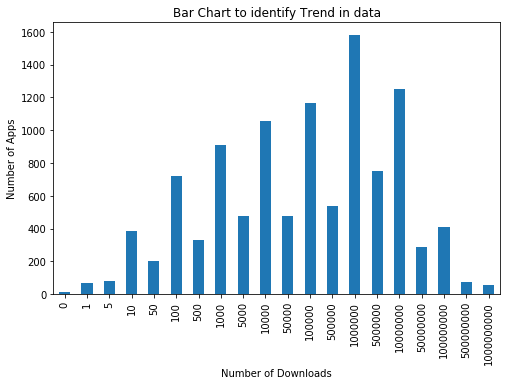

In [205]:
# Bar PLot for visualising the trends in ordered categories
trend_data.plot(kind='bar', figsize=(8,5))
plt.ylabel("Number of Apps")
plt.xlabel("Number of Downloads")
plt.title("Bar Chart to identify Trend in data")
plt.show()

# Uncomment code below to see why a line plot is not suitable in such a scenario (Can you answer Why?)
# # Line PLot for visualising the trends  (Why is this not suitable here?)
# trend_data.plot(figsize=(8,5))
# plt.ylabel("Number of Apps")
# plt.xlabel("Number of Downloads")
# plt.title("Line Plot to identify Trend in data")
# plt.show()

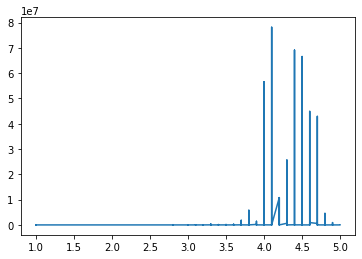

In [208]:
# Line Plot for identifying trends
trend_reviews = df.sort_values(by='Rating')
plt.plot(trend_reviews.Rating, trend_reviews.Reviews)